In [1]:
import os
import pandas as pd

In [94]:
# folder path
dir_path = r'.\Data'

def make_directory(path):
    temp = []
    # Iterate directory
    for i in os.listdir(path):
    # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, i)):
                temp.append(os.path.join(dir_path, i))

    return temp

temp = make_directory(dir_path)

temp

['.\\Data\\GasFutureHistory_CEGH_VTP_2020.xlsx',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2021.xlsx',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2022.xlsx',
 '.\\Data\\GasFutureHistory_THE_2021.xlsx',
 '.\\Data\\GasFutureHistory_THE_2022.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2020.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2021.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2022.xlsx',
 '.\\Data\\GasSpotHistory_THE_2021.xlsx',
 '.\\Data\\GasSpotHistory_THE_2022.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2019.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2020.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2021.xlsx']

In [91]:
#empty dictionary for dataframes
dict = {}
# Iterate files
for file in temp:
    #check if files are Spot market relates
    if 'Spot' in file:
        df = pd.read_excel(file, header = 2, sheet_name= None)
        #dynamicly create keys for dict
        name_WAAP = 'df_WAAP_'+list(df.keys())[3][:4].strip()
        name_DA = 'df_DA_'+list(df.keys())[3][:4].strip()
        #Check if keys already in dict
        if name_WAAP and name_DA not in dict.keys():
            #create key and value pair for weighted average Price and Spot products
            dict[name_DA] = df[list(df.keys())[3]].groupby(by=['Trading Date', 'Product']).sum()
            dict[name_WAAP] = df['EGSI']
        else:
            #if keys already created join dataframes
            dict[name_WAAP] = pd.concat([dict[name_WAAP],df['EGSI']], ignore_index=True)
            dict[name_DA] = pd.concat([dict[name_DA],df[list(df.keys())[3]].groupby(by=['Trading Date', 'Product']).sum()], ignore_index=True)

In [85]:
dict.keys()

dict_keys(['df_DA_CEGH', 'df_WAAP_CEGH', 'df_DA_THE', 'df_WAAP_THE', 'df_DA_TTF', 'df_WAAP_TTF'])

In [80]:
if 'df_DA_CEGH' and 'df_WAAP_CEGH' not in dict.keys():
    print('yes')

In [92]:
dict['df_WAAP_CEGH'].sort_values('Trading Date')

,Trading Date,Delivery Start,Delivery End,Price
306,2020-01-02,2020-01-03,2020-01-04,12.574
304,2020-01-03,2020-01-04,2020-01-06,12.752
305,2020-01-03,2020-01-06,2020-01-07,12.749
303,2020-01-06,2020-01-07,2020-01-08,13.157
302,2020-01-07,2020-01-08,2020-01-09,12.624
...,...,...,...,...
627,2022-11-23,2022-11-24,2022-11-25,124.876
626,2022-11-24,2022-11-25,2022-11-26,121.788
625,2022-11-25,2022-11-28,2022-11-29,122.138
624,2022-11-25,2022-11-26,2022-11-28,118.997


In [40]:
df['CEGH Day Ahead'].groupby(by=['Trading Date', 'Product']).sum()

Settlement\nPrice  Open Price  High Price  Low Price  \
Trading Date Product                                                         
2021-01-01   GND1                 0.000      33.050      33.675     33.000   
2021-01-02   GND1                 0.000      33.275      34.150     33.250   
2021-01-03   GND1                 0.000      17.125      17.250     16.775   
2021-01-04   GND1                18.111      18.475      18.700     17.850   
2021-01-05   GND1                17.003      18.150      18.150     16.800   
...                                 ...         ...         ...        ...   
2021-12-29   GND1                89.258      94.200     103.750     86.000   
2021-12-30   GND1                79.584     343.000     344.800    326.000   
             GWE1                 0.000      88.500      88.500     80.000   
2021-12-31   GND1                72.982     297.550     305.850    255.025   
             GWE1                72.240      79.000      79.000     61.500   

                      Last Price  Traded Lots  Traded Volume  Number of Trades  
Trading Date Product                                                            
2021-01-01   GND1         33.650       1042.0        25008.0              21.0  
2021-01-02   GND1         33.850        873.0        20952.0              19.0  
2021-01-03   GND1         17.000        557.0        13368.0              14.0  
2021-01-04   GND1         18.000       8923.0       214152.0             176.0  
2021-01-05   GND1         17.000      12150.0       291600.0             250.0  
...                          ...          ...            ...               ...  
2021-12-29   GND1         91.525      26481.0       635544.0             501.0  
2021-12-30   GND1        328.000      28521.0       684504.0             610.0  
             GWE1         81.000       1864.0       134208.0              34.0  
2021-12-31   GND1        262.175      16546.0       397104.0             267.0  
             GWE1         67.000      18910.0      1361520.0             330.0  

[442 rows x 8 columns]

<AxesSubplot:>

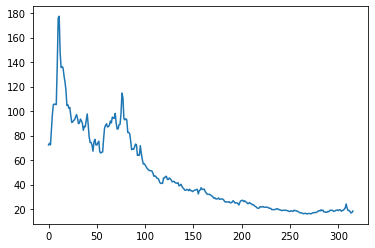

In [9]:
df['EGSI']['Price'].plot()